In [1]:
import os
import pandas as pd
import math

# folder path
dir_path  = '/home/cecilia/repos/mogp_with_terms/moeir_comparison/to_ceci/'
save_path = '/home/cecilia/repos/mogp_with_terms/moeir_comparison/'

In [2]:
df_ave_data = pd.DataFrame()

path_pr = "".join([dir_path, "Precision@10.csv"])
# read text file into pandas DataFrame
df_ave_data = pd.read_csv(path_pr, header=0, sep=',')


## set the 'topic' column as index
df_ave_data.columns = ['topic','0', '1', '2', '3', '4','5']
df_ave_data.set_index('topic', inplace=True)
#df_ave_data = df_ave_data.sort_values(by='topic', ascending=True)

df_ave_data = df_ave_data.drop(['0'], axis=1)

df_ave_data = df_ave_data.transpose()
df_ave_data.to_csv(save_path + 'moeir_precision10_evaluation_by_run_last_gen.csv')

df_ave_data

topic,1,134,187,215,221,25,259,289,350,363,...,476,528,529,537,538,556,561,58,586,99
1,0.59100,0.651000,0.037000,0.4300,0.805,0.169000,0.028000,0.405000,0.476964,0.2040,...,0.255778,0.689000,0.411333,0.494000,0.680,0.279571,0.183429,0.554,0.413000,0.799
2,0.47500,0.284000,0.020000,0.4375,0.480,0.199000,0.220000,0.751000,0.609000,0.4835,...,0.080000,0.626000,0.242000,0.517000,0.711,0.378000,0.018000,0.690,0.375889,0.453
3,0.52100,0.546000,0.158000,0.5400,0.730,0.156000,0.101571,0.493667,0.540444,0.2210,...,0.101556,0.324595,0.253000,0.374500,0.511,0.113000,0.129000,0.063,0.366889,0.659
4,0.14800,0.312278,0.103667,0.5250,0.666,0.250000,0.113000,0.530333,0.416571,0.1350,...,0.021000,0.580000,0.372000,0.572786,0.780,0.052000,0.009000,0.123,0.415921,0.869
5,0.59075,0.332000,0.037000,0.4750,0.550,0.079333,0.043000,0.547000,0.292000,0.2200,...,0.285000,0.640000,0.529333,0.372000,0.663,0.431000,0.086000,0.706,0.487000,0.513


In [3]:

stats_by_topic = df_ave_data.agg(['mean', 'count', 'std'])
stats_by_topic

,1,134,187,215,221,25,259,289,350,363,...,476,528,529,537,538,556,561,58,586,99
mean,0.465150,0.425056,0.071133,0.481500,0.646200,0.170667,0.101114,0.545400,0.466996,0.252700,...,0.148667,0.571919,0.361533,0.466057,0.669000,0.250714,0.085086,0.427200,0.411740,0.658600
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
std,0.183993,0.163519,0.058200,0.049862,0.131823,0.062562,0.075826,0.127367,0.121270,0.133761,...,0.115426,0.143616,0.119179,0.089438,0.099003,0.164309,0.073977,0.311469,0.047382,0.178502


In [4]:
stats_all_topics =stats_by_topic.transpose()
stats_all_topics

,mean,count,std
1,0.465150,5.0,0.183993
134,0.425056,5.0,0.163519
187,0.071133,5.0,0.058200
215,0.481500,5.0,0.049862
221,0.646200,5.0,0.131823
25,0.170667,5.0,0.062562
259,0.101114,5.0,0.075826
289,0.545400,5.0,0.127367
350,0.466996,5.0,0.121270
363,0.252700,5.0,0.133761


In [5]:
stats_all_topics['mean'].describe().transpose()


t = pd.DataFrame({  'mean_prec': [stats_all_topics['mean'].mean()],                    
                    'count_prec': [stats_all_topics['mean'].count()],
                    'std_prec': [stats_all_topics['mean'].std()]})

ci95_hi = []
ci95_lo = []

m, c, s = t.loc[0]

ci95_hi.append(m + 1.96*s/math.sqrt(c))
ci95_lo.append(m - 1.96*s/math.sqrt(c))

t['ci95_lo_prec'] = ci95_lo
t['ci95_hi_prec'] = ci95_hi


t.to_csv(save_path + 'moeir_precision10_evaluation_stats_last_gen.csv')
t

,mean_prec,count_prec,std_prec,ci95_lo_prec,ci95_hi_prec
0,0.396307,25,0.213751,0.312517,0.480097


Text(0.5, 0.98, 'Precision@10  - MOEIR ')

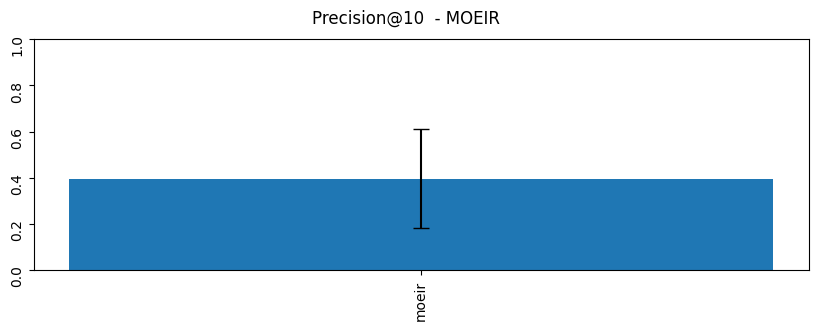

In [9]:
######### PRECISION @ 10
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1,1, figsize=(10, 3), sharey=False)
axs.tick_params(labelrotation=90)
axs.bar('moeir', t['mean_prec'], yerr=t['std_prec'], capsize=6)
axs.set_ylim(0,1)
fig.suptitle('Precision@10  - MOEIR ')